# Feature Selection with Correlation

In this step we will be removing the features which are highly correlated

In [1]:
#importing libraries
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the Boston Housing dataset
boston = fetch_openml(name='boston')
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df["MEDV"] = boston.target

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [4]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [5]:
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
X = df.drop(labels=['MEDV'], axis=1)
y = df["MEDV"]

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [11]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80


In [12]:
X_train.corr()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,0.416560,-0.188280,0.329927,-0.355840,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.523572,0.319260,-0.583885,0.658331,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.750218,-0.392969,0.629257,-0.686848,0.719038,0.388353,-0.331638,0.603374
NOX,0.416560,-0.523572,0.750218,1.000000,-0.279202,0.740052,-0.765753,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,-0.279202,1.000000,-0.235839,0.183857,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.740052,-0.235839,1.000000,-0.761543,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.765753,0.183857,-0.761543,1.000000,-0.519643,-0.176620,0.248376,-0.501780
TAX,0.560570,-0.327834,0.719038,0.683445,-0.275242,0.502429,-0.519643,1.000000,0.447518,-0.412145,0.515905
PTRATIO,0.264780,-0.392838,0.388353,0.179046,-0.385526,0.239729,-0.176620,0.447518,1.000000,-0.145638,0.387752
B,-0.299525,0.164641,-0.331638,-0.369445,0.157459,-0.250416,0.248376,-0.412145,-0.145638,1.000000,-0.365338


<AxesSubplot:>

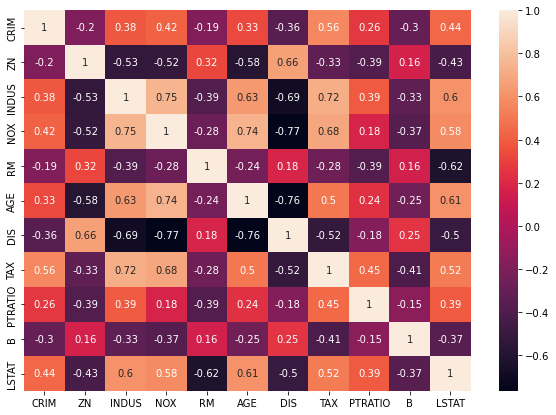

In [13]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(X_train.corr(), annot = True)

In [14]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [16]:
for col in corr_features:
    print(col)

AGE
TAX
NOX


In [17]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,6.333,5.2146,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,6.216,1.1691,24,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,6.373,3.3633,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,5.349,1.7028,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,6.232,5.0141,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,7.147,6.0622,3,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,6.193,1.9356,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,5.277,1.4261,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,6.635,3.3175,4,18.4,396.90,4.54


## Let try with Big Dataset

https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [18]:
import pandas as pd
df_new = pd.read_csv('train.csv')
df_new

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [19]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [20]:
X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [22]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
   X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((53214, 370), (22806, 370))

<AxesSubplot:>

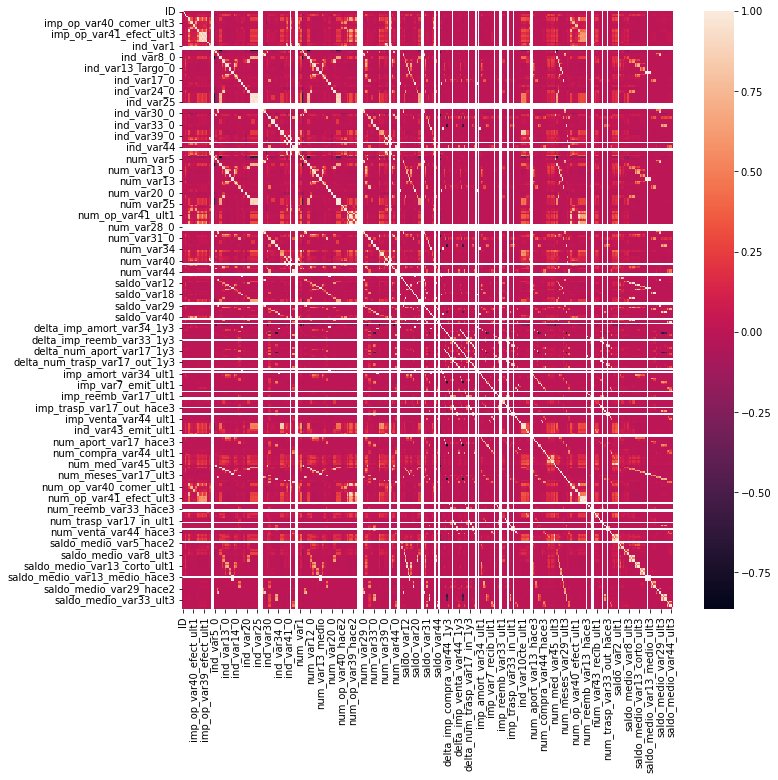

In [23]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [24]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

232

In [26]:
for col in corr_features:
    print(col)

imp_op_var39_efect_ult3
var21
ind_var24
num_var29
num_var26
num_compra_var44_ult1
num_op_var40_ult3
ind_var17
num_var45_hace3
num_var13_largo
saldo_var13_corto
delta_num_trasp_var17_in_1y3
saldo_medio_var17_ult1
ind_var37_0
saldo_var29
saldo_medio_var5_ult3
ind_var32_0
imp_trasp_var33_in_ult1
delta_num_venta_var44_1y3
ind_var31
num_var13_largo_0
num_var30_0
num_var1_0
num_meses_var13_largo_ult3
ind_var30
saldo_medio_var13_corto_ult3
ind_var20
ind_var26_cte
ind_var39
imp_trans_var37_ult1
num_var25_0
imp_op_var41_ult1
imp_amort_var18_ult1
delta_imp_amort_var18_1y3
num_var12
ind_var18
ind_var9_ult1
ind_var25
imp_trasp_var33_out_ult1
num_var34_0
saldo_var40
num_op_var40_efect_ult3
num_op_var40_comer_ult1
imp_aport_var13_ult1
num_op_var41_ult3
num_op_var41_ult1
delta_num_aport_var17_1y3
saldo_var42
num_trasp_var33_in_hace3
saldo_var17
saldo_medio_var44_ult3
num_var45_ult3
num_var24
saldo_medio_var13_corto_ult1
saldo_var13_medio
ind_var41_0
imp_op_var39_ult1
saldo_medio_var13_largo_ult3
num_

In [27]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace3,var38
36443,72815,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,94804.740000
17577,35209,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,119861.310000
28097,56215,2,44,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,117310.979016
34967,69919,2,24,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,51001.260000
50314,100469,2,80,0.0,0.00,0.0,0.0,0.0,900.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,93676.230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49159,98197,2,40,0.0,1086.00,0.0,0.0,0.0,17490.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,94645.140000
38812,77662,2,43,0.0,552.30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,47228.970000
60399,120549,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,155925.360000
40783,81608,2,31,0.0,426.18,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,149280.450000
